In [2]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import word2vec
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import *
import tensorflow as tf
import numpy as np


import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout, LSTM
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


ModuleNotFoundError: No module named 'wordcloud'

In [3]:
import pandas as pd

In [5]:
#sentimientosOriginal = pd.read_excel('work/sentimientos.xlsx')
sentimientosOriginal = pd.read_excel('sentimientos.xlsx')
sentimientosOriginal.head(5)
sentimientosOriginal['sentimiento'].value_counts().plot(kind='bar', colormap='viridis')

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [135]:
for col in sentimientosOriginal.columns.values:
    sentimientosOriginal[col] = sentimientosOriginal[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

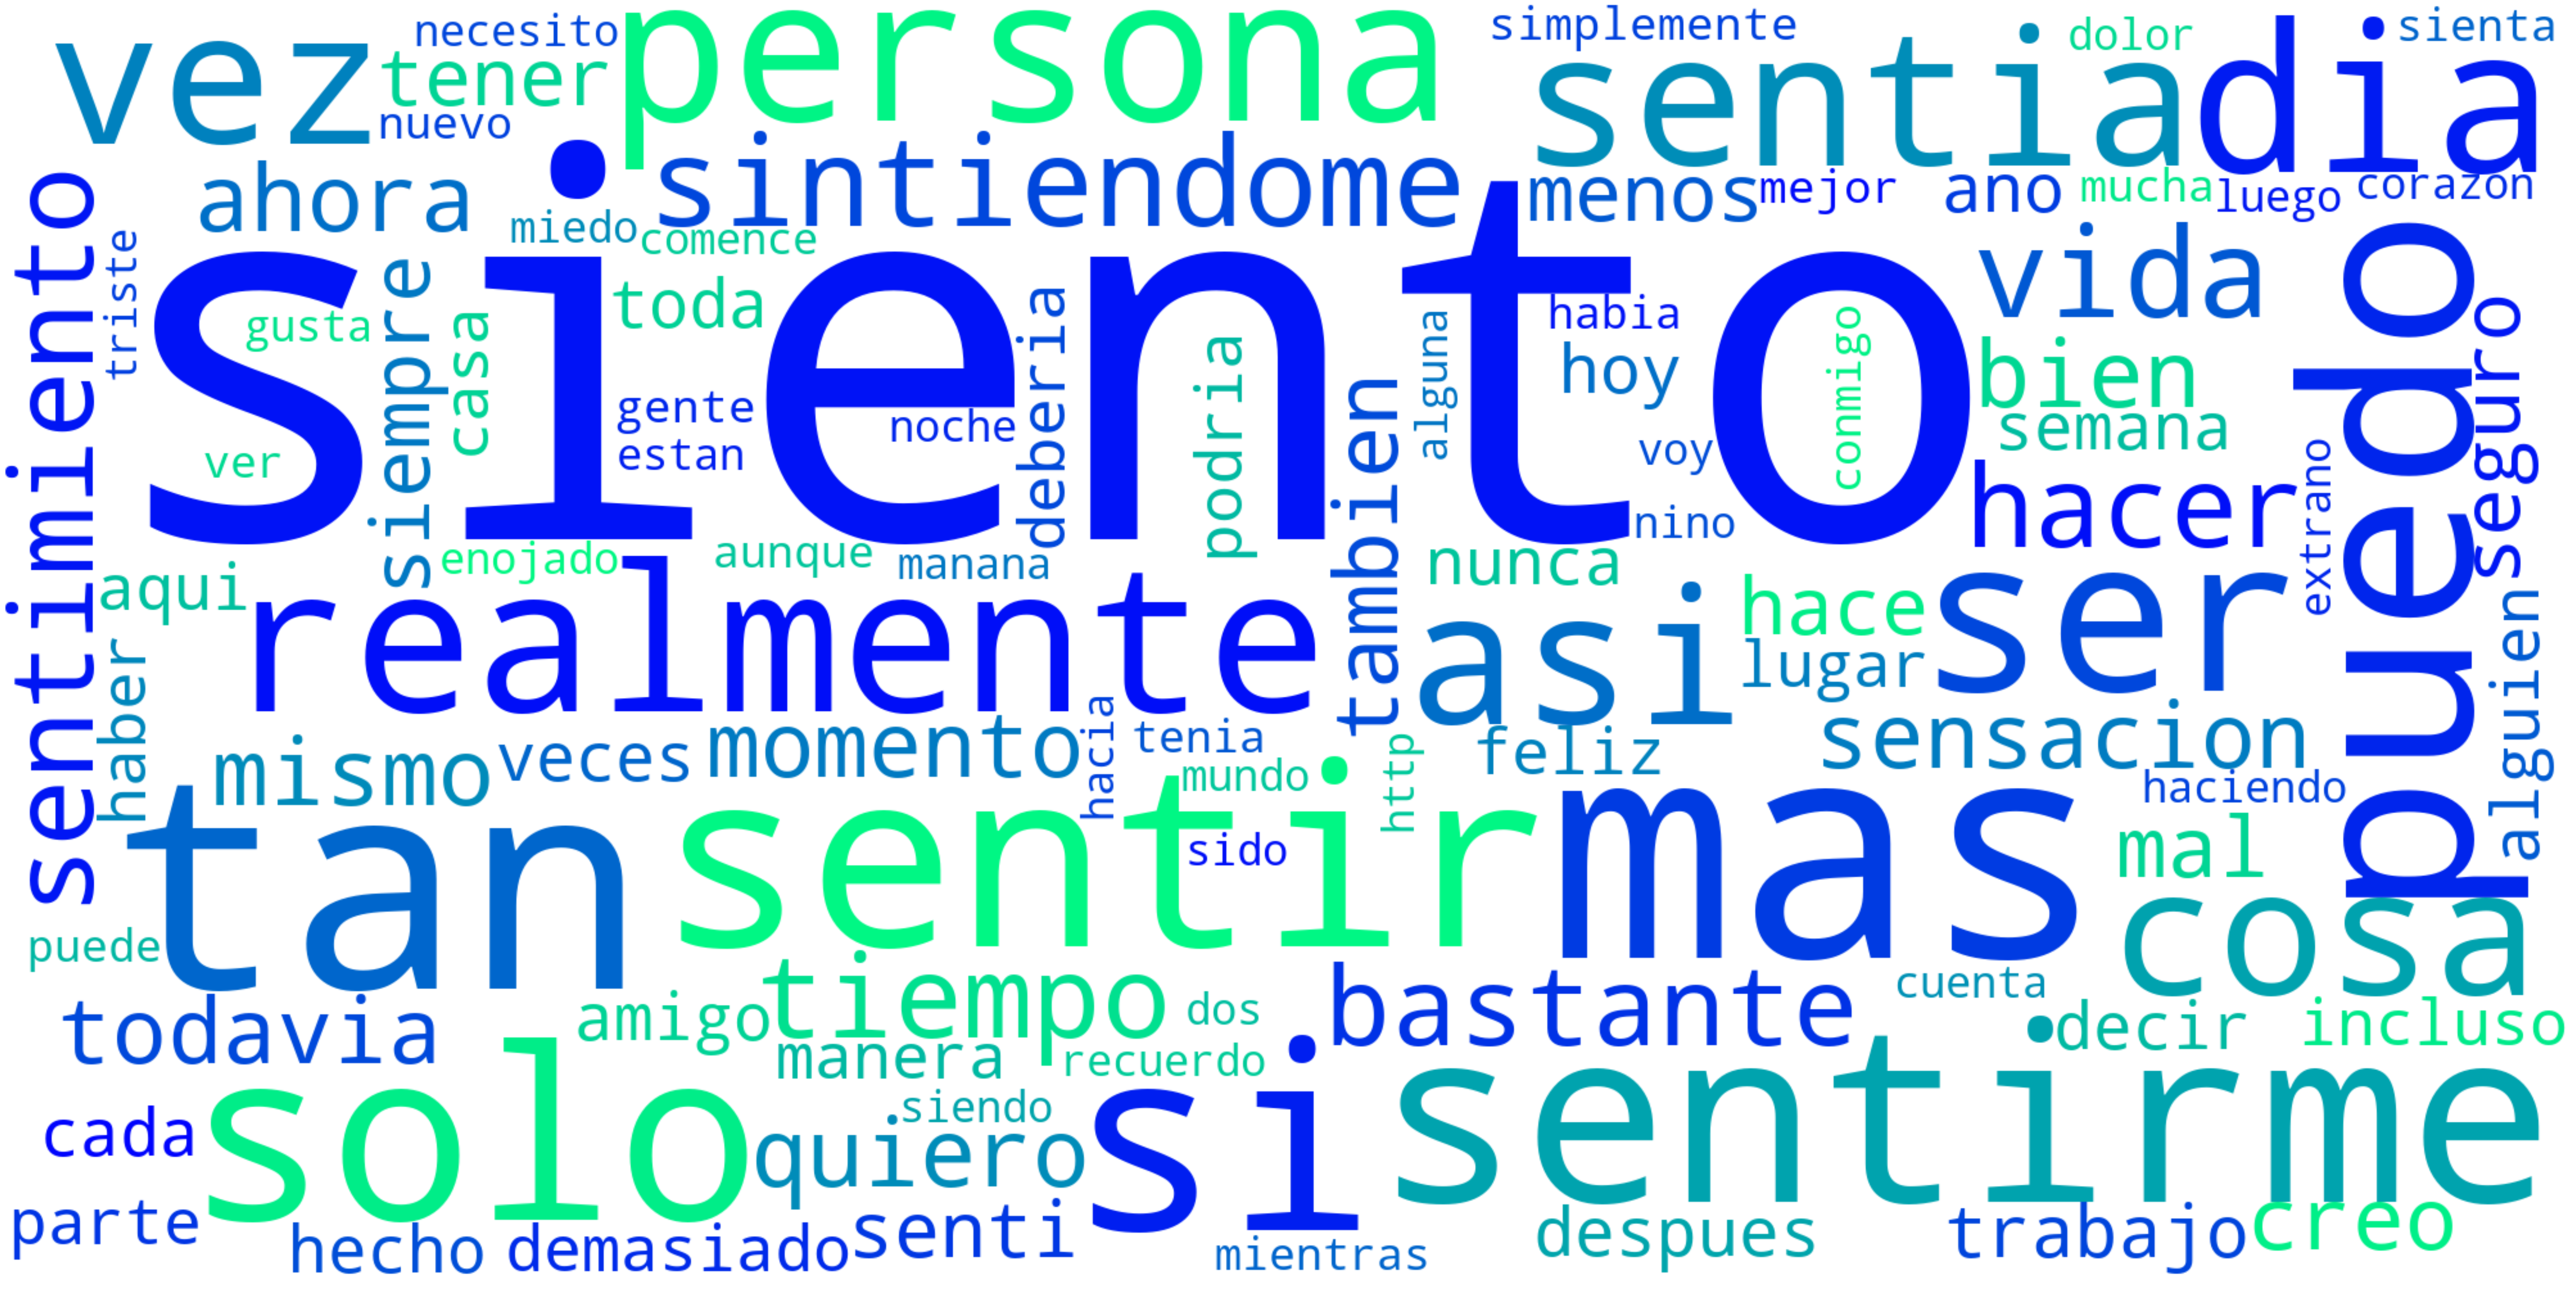

In [136]:


set_stop_words = set(stopwords.words("spanish"))

wordcloud = WordCloud(width=2000,
                      height=1000,
                      max_words=100,
                      normalize_plurals=True,
                      font_step=1,
                      relative_scaling=0.5,
                      collocations=False,
                      stopwords = set_stop_words,
                      background_color="white",
                      colormap='winter',
                      include_numbers=False).generate(" ".join(list(sentimientosOriginal.descripcion)))

plt.figure(figsize = (80, 50), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [137]:
def generar_wordcloud(emotion, colormap, data): 
    wordcloud = WordCloud(width=500,
                          height=300,
                          max_words=100,
                          normalize_plurals=True,
                          font_step=1,
                          relative_scaling=0.5,
                          collocations=False,
                          stopwords = set_stop_words,
                          background_color="white",
                          colormap=colormap,
                          include_numbers=False).generate(" ".join(list(data.descripcion)))
    plt.title('Sentimiento: ' + emotion)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

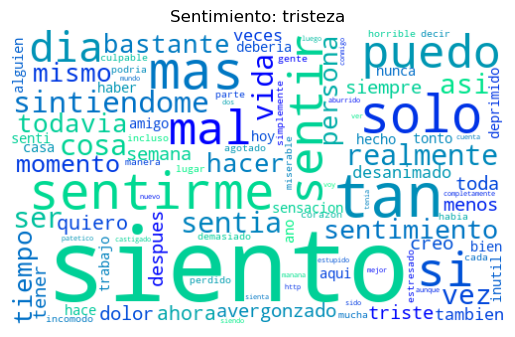

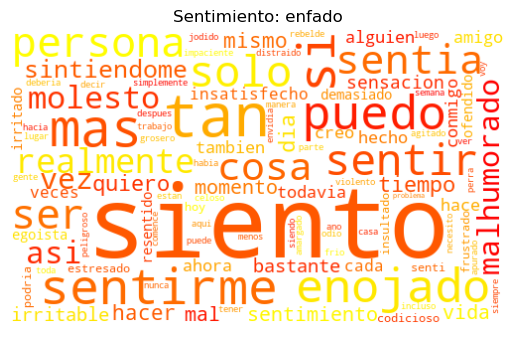

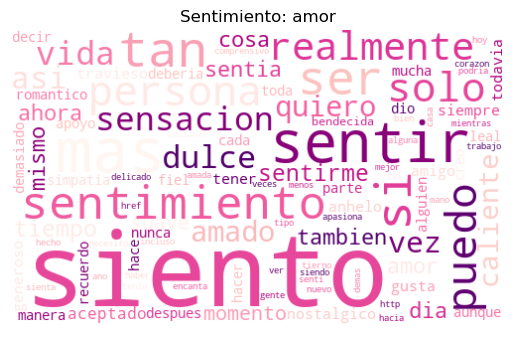

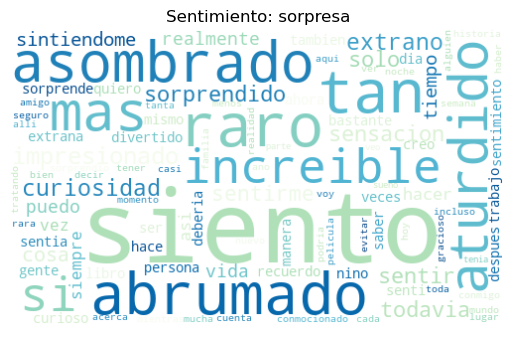

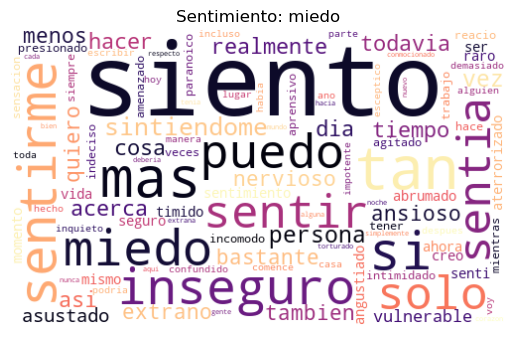

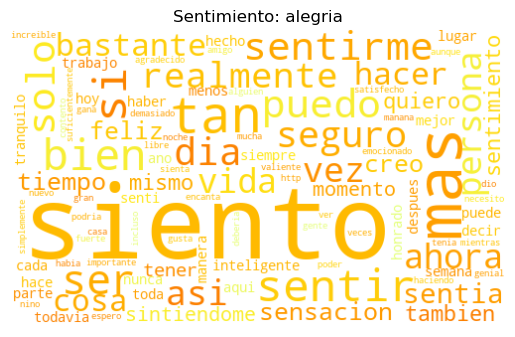

In [138]:
colormaps = {
    'tristeza' : 'winter',
    'enfado' : 'autumn',
    'amor' : 'RdPu',
    'sorpresa' : 'GnBu',
    'miedo' : 'magma',
    'alegria' : 'Wistia'
}

for se in sentimientosOriginal.sentimiento.unique():
    generar_wordcloud(se, colormaps[se], sentimientosOriginal[sentimientosOriginal['sentimiento'] == se])



In [139]:
# from sklearn.model_selection import train_test_split
# entrenamiento,prueba = train_test_split(sentimientosOriginal, , test_size=0.1)
entrenamiento = sentimientosOriginal.iloc[:18000,:]
prueba = sentimientosOriginal.iloc[18000:,:]

In [140]:
print('entrenamiento' + str(entrenamiento.shape))
print('prueba ' + str(prueba.shape))

entrenamiento(18000, 2)
prueba (2000, 2)


In [141]:
# from transformers import pipeline
# # sePipe = pipeline("sentiment-analysis",model="codeswitch-spaeng-sentiment-analysis-lince")
# sePipe = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")

In [142]:
# entrenamiento['sent'] = entrenamiento.descripcion.apply(sePipe)
# prueba['sent'] = prueba.descripcion.apply(sePipe)

# entrenamiento

In [143]:
# entrenamiento['sent'] = entrenamiento['sent'].apply(lambda x : x[0]['label'])
# prueba['sent'] = prueba['sent'].apply(lambda x : x[0]['label'])



In [144]:
entrenamiento

descripcion sentimiento
0                                  no me senti humillado    tristeza
1      puedo pasar de sentirme tan desesperado a tene...    tristeza
2      estoy aprovechando un minuto para publicar me ...      enfado
3      siempre me siento nostalgico por la chimenea. ...        amor
4                                  me siento malhumorado      enfado
...                                                  ...         ...
17995  sigo sintiendo que alguien no es amable conmig...      enfado
17996  me siento un poco malhumorado negativo despues...      enfado
17997  siento que soy util para mi gente y eso me da ...     alegria
17998  me siento mas comodo con el derby siento que p...     alegria
17999  me siento raro cuando tengo que conocer a pers...       miedo

[18000 rows x 2 columns]

In [145]:
entrenamiento["descripcion"]

0                                    no me senti humillado
1        puedo pasar de sentirme tan desesperado a tene...
2        estoy aprovechando un minuto para publicar me ...
3        siempre me siento nostalgico por la chimenea. ...
4                                    me siento malhumorado
                               ...                        
17995    sigo sintiendo que alguien no es amable conmig...
17996    me siento un poco malhumorado negativo despues...
17997    siento que soy util para mi gente y eso me da ...
17998    me siento mas comodo con el derby siento que p...
17999    me siento raro cuando tengo que conocer a pers...
Name: descripcion, Length: 18000, dtype: object

In [146]:
entrenamiento["sentimiento"] = entrenamiento["sentimiento"].astype('category')
entrenamiento["sentimiento_label"] = entrenamiento["sentimiento"].cat.codes

prueba["sentimiento"] = prueba["sentimiento"].astype('category')
prueba["sentimiento_label"] = prueba["sentimiento"].cat.codes
entrenamiento.head()

/tmp/ipykernel_155/3506918955.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_155/3506918955.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_155/3506918955.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_155/350

descripcion sentimiento  \
0                              no me senti humillado    tristeza   
1  puedo pasar de sentirme tan desesperado a tene...    tristeza   
2  estoy aprovechando un minuto para publicar me ...      enfado   
3  siempre me siento nostalgico por la chimenea. ...        amor   
4                              me siento malhumorado      enfado   

   sentimiento_label  
0                  5  
1                  5  
2                  2  
3                  1  
4                  2

In [147]:
entrenamientoCaracteristica, entrenamientoEtiquetas = entrenamiento['descripcion'], tf.one_hot(
    entrenamiento["sentimiento_label"], 6)
pruebaCaracteristica, pruebaEtiqueta = prueba['descripcion'], tf.one_hot(
    prueba["sentimiento_label"], 6)



In [148]:
entrenamientoCaracteristica

0                                    no me senti humillado
1        puedo pasar de sentirme tan desesperado a tene...
2        estoy aprovechando un minuto para publicar me ...
3        siempre me siento nostalgico por la chimenea. ...
4                                    me siento malhumorado
                               ...                        
17995    sigo sintiendo que alguien no es amable conmig...
17996    me siento un poco malhumorado negativo despues...
17997    siento que soy util para mi gente y eso me da ...
17998    me siento mas comodo con el derby siento que p...
17999    me siento raro cuando tengo que conocer a pers...
Name: descripcion, Length: 18000, dtype: object

In [149]:

def decodificar(codigo):
    label_code = np.argmax(codigo, axis=1)
    label = entrenamiento.sentimiento.cat.categories[label_code]
    return list(label)



In [150]:
test= np.array(entrenamientoEtiquetas[:5])
decodificar(test)

['tristeza', 'tristeza', 'enfado', 'amor', 'enfado']

In [151]:
entrenamientoEtiquetas[:5]

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [152]:
pruebaCaracteristica

18000    me siento bastante triste y lo siento por mi m...
18001    siento que todavia estoy mirando un lienzo en ...
18002                           me siento un fiel servidor
18003                  solo me siento malhumorado y triste
18004    puedo tener para un regalo o si me siento festivo
                               ...                        
19995    manana por la manana tengo un examen de ssa es...
19996    me preocupo constantemente por su lucha contra...
19997    siento que es importante compartir esta inform...
19998    realmente siento que si eres lo suficientement...
19999    siento que solo quiero comprar cualquier maqui...
Name: descripcion, Length: 2000, dtype: object

In [153]:
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()

tokenEntrenameintoCaracteristica = [toktok.tokenize(x) for x in entrenamientoCaracteristica]
tokenPruebaCaracteristica = [toktok.tokenize(y) for y in pruebaCaracteristica]


In [154]:
tokenPruebaCaracteristica

[['me',
  'siento',
  'bastante',
  'triste',
  'y',
  'lo',
  'siento',
  'por',
  'mi',
  'mismo',
  ',',
  'pero',
  'pronto',
  'saldre',
  'de',
  'eso',
  '.'],
 ['siento',
  'que',
  'todavia',
  'estoy',
  'mirando',
  'un',
  'lienzo',
  'en',
  'blanco',
  'pedazos',
  'de',
  'papel',
  'en',
  'blanco'],
 ['me', 'siento', 'un', 'fiel', 'servidor'],
 ['solo', 'me', 'siento', 'malhumorado', 'y', 'triste'],
 ['puedo',
  'tener',
  'para',
  'un',
  'regalo',
  'o',
  'si',
  'me',
  'siento',
  'festivo'],
 ['empiezo',
  'a',
  'sentirme',
  'mas',
  'agradecido',
  'por',
  'lo',
  'que',
  'dios',
  'ha',
  'hecho',
  'por',
  'mi',
  '.'],
 ['me',
  'siento',
  'mas',
  'seguro',
  'de',
  'que',
  'podremos',
  'cuidar',
  'de',
  'este',
  'bebe'],
 ['me',
  'siento',
  'increiblemente',
  'afortunado',
  'solo',
  'de',
  'poder',
  'hablar',
  'con',
  'ella',
  '.'],
 ['me',
  'siento',
  'menos',
  'interesado',
  'en',
  'el',
  'ejercito',
  'cada',
  'dia'],
 ['me'

In [155]:
lista_len_text = [len(x) for x in tokenEntrenameintoCaracteristica]

In [156]:
fig = px.histogram(
    x=lista_len_text,
    template='plotly_white'
)
fig.update_layout(
    title={
        'text': "Numero de palabras",
        'x': 0.4,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Frecuencia').update_xaxes(
    title='Numero de palabras')
fig.update_layout(showlegend=False)
fig.update_layout(hovermode='x')
fig.show()

In [157]:
fig = px.box(
    x=lista_len_text,
    template='plotly_white'
)
fig.update_layout(
    title={
        'text': "Boxplot Numero de palabra",
        'x': 0.4,
        'xanchor': 'center'
    })
fig.update_xaxes(
    title='Numero de palabra')
fig.update_layout(showlegend=False)
fig.update_layout(hovermode='x')
fig.show()

In [158]:
tamañoVector = 300
w2v_model = word2vec.Word2Vec(
    tokenEntrenameintoCaracteristica,
    vector_size=tamañoVector,  
    window=20,
    min_count=1,
    sg=1  
)
w2v_model

In [159]:
len(w2v_model.wv)

20626

In [160]:
w2v_model.wv.most_similar('amoroso', topn=10)

[('funcione', 0.9712637066841125),
 ('misericordioso', 0.9674264192581177),
 ('temporal', 0.9656410813331604),
 ('humana', 0.9647688865661621),
 ('cristo', 0.9643914103507996),
 ('innecesario', 0.9623550772666931),
 ('adoro', 0.9622682332992554),
 ('convierta', 0.9614987373352051),
 ('dignidad', 0.9594666361808777),
 ('carinosa', 0.9592445492744446)]

In [161]:

# bandera Capa incrustadora
tamañoVocab = len(w2v_model.wv)
max_seq_len = 20

vocab = w2v_model.wv.key_to_index.keys()
embedding_matrix = w2v_model.wv[vocab]

In [162]:
tamañoVocab, tamañoVector, max_seq_len

(20626, 300, 20)

In [163]:
listadoVocablo = list(w2v_model.wv.key_to_index.keys())

In [164]:
def remover_OOV(muestra: list, listadoVocablo):
    in_vocab_sample = []
    for each_token in muestra:
        if each_token in listadoVocablo:
            in_vocab_sample.append(each_token)
    return in_vocab_sample

In [165]:
tokenPruebaCaracteristica = [remover_OOV(y, listadoVocablo) for y in tokenPruebaCaracteristica]

In [166]:
def w2v_indexed_token_sequences(w2v_model, list_features):
    indexed_features = []
    for each_seq in list_features:
        list_token_indices = []
        for each_token in each_seq:
            try:
                list_token_indices.append(w2v_model.wv.key_to_index[each_token])
            except KeyError as e:
                continue
        indexed_features.append(list_token_indices)
    return indexed_features

In [167]:
indiceEntrenameintoCaracteristica = w2v_indexed_token_sequences(w2v_model, tokenEntrenameintoCaracteristica)

indicePruebaCaracteristica = w2v_indexed_token_sequences(w2v_model, tokenPruebaCaracteristica)

len(indiceEntrenameintoCaracteristica), len(indicePruebaCaracteristica)

(18000, 2000)

In [168]:
padded_entrenamiento = pad_sequences(indiceEntrenameintoCaracteristica, padding = 'post', maxlen=max_seq_len, truncating='post')
padded_prueba = pad_sequences(indicePruebaCaracteristica, padding = 'post', maxlen=max_seq_len, truncating='post')

In [169]:
padded_entrenamiento

array([[  10,    2,   89, ...,    0,    0,    0],
       [  43,  263,    1, ...,   17, 1032,    4],
       [  24, 5140,   12, ...,    0,    0,    0],
       ...,
       [   3,    0,   55, ...,    0,    0,    0],
       [   2,    3,   25, ...,    0,    0,    0],
       [   2,    3,  243, ...,    6,   22,  294]], dtype=int32)

In [170]:
def obtenerModelo():
    model = Sequential()
    model.add(
        Embedding(input_dim=tamañoVocab,
                  output_dim=tamañoVector,
                  weights=[embedding_matrix],
                  input_length=max_seq_len))
    model.add(Dropout(0.6))
    model.add(LSTM(max_seq_len,return_sequences=True))
    model.add(LSTM(6))
    model.add(Dense(6,activation='softmax'))
    return model


callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  patience=2,
                                  verbose=1,
                                  restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath='work/sent_w2v.h5',
                                    verbose=1,
                                    save_best_only=True)
]

In [171]:
model = obtenerModelo()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 300)           6187800   
                                                                 
 dropout_1 (Dropout)         (None, 20, 300)           0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 20)            25680     
                                                                 
 lstm_3 (LSTM)               (None, 6)                 648       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
Total params: 6,214,170
Trainable params: 6,214,170
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [173]:
tf.config.run_functions_eagerly(True)
history = model.fit(padded_entrenamiento, 
                    entrenamientoEtiquetas,
                    validation_split=0.33,
                    callbacks=callbacks,
                    epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



377/377 [==============================] - ETA: 0s - loss: 1.5583 - accuracy: 0.3737
Epoch 1: val_loss improved from inf to 1.39444, saving model to work/sent_w2v.h5
377/377 [==============================] - 92s 243ms/step - loss: 1.5583 - accuracy: 0.3737 - val_loss: 1.3944 - val_accuracy: 0.4999
Epoch 2/10
377/377 [==============================] - ETA: 0s - loss: 1.2123 - accuracy: 0.5658
Epoch 2: val_loss improved from 1.39444 to 1.06101, saving model to work/sent_w2v.h5
377/377 [==============================] - 115s 306ms/step - loss: 1.2123 - accuracy: 0.5658 - val_loss: 1.0610 - val_accuracy: 0.6282
Epoch 3/10
377/377 [==============================] - ETA: 0s - loss: 0.7866 - accuracy: 0.7428
Epoch 3: val_loss improved from 1.06101 to 0.84275, saving model to work/sent_w2v.h5
377/377 [==============================] - 98s 260ms/step - loss: 0.7866 - accuracy: 0.7428 - val_loss: 0.8427 - val_accuracy: 0.7314
Epoch 4/10
377/377 [==============================] - ETA: 0s - loss:

In [174]:
epochs = list(range(1, max(history.epoch) + 2))
perdidaEntrenamiento = history.history["loss"]
perdidaValidacion = history.history["val_" + "loss"]

trace1 = {
    "mode": "lines+markers",
    "name": "Perdida de Entrenamiento",
    "type": "scatter",
    "x": epochs,
    "y": perdidaEntrenamiento
}

trace2 = {
    "mode": "lines+markers",
    "name": "Perdida de Validacion",
    "type": "scatter",
    "x": epochs,
    "y": perdidaValidacion
}

data = Data([trace1, trace2])
layout = {
    "title": "Entrenamiento con Word2Vec Embeddings",
    "xaxis": {
        "title": "Numero de epochs",
        "titlefont": {
            "size": 18,
            "color": "#7f7f7f"
        }
    },
    "yaxis": {
        "title": "Loss",
        "titlefont": {
            "size": 18,
            "color": "#7f7f7f"
        }
    }
}
fig = Figure(data=data, layout=layout)
fig.update_layout(hovermode="x unified")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [175]:
model_with_no_w2v = keras.models.load_model('work/sent_w2v.h5')

In [176]:
y_pred_one_hot_encoded = (model_with_no_w2v.predict(padded_prueba)> 0.5).astype("int32")
y_pred_one_hot_encoded

decodificar(y_pred_one_hot_encoded)

63/63 [==============================] - 4s 69ms/step


['tristeza',
 'tristeza',
 'alegria',
 'enfado',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'tristeza',
 'enfado',
 'alegria',
 'sorpresa',
 'tristeza',
 'tristeza',
 'alegria',
 'alegria',
 'tristeza',
 'alegria',
 'alegria',
 'miedo',
 'alegria',
 'alegria',
 'tristeza',
 'tristeza',
 'tristeza',
 'alegria',
 'amor',
 'tristeza',
 'tristeza',
 'alegria',
 'tristeza',
 'alegria',
 'enfado',
 'tristeza',
 'alegria',
 'tristeza',
 'tristeza',
 'enfado',
 'alegria',
 'alegria',
 'tristeza',
 'tristeza',
 'tristeza',
 'miedo',
 'enfado',
 'tristeza',
 'alegria',
 'tristeza',
 'alegria',
 'tristeza',
 'alegria',
 'alegria',
 'tristeza',
 'alegria',
 'alegria',
 'tristeza',
 'tristeza',
 'tristeza',
 'amor',
 'alegria',
 'alegria',
 'tristeza',
 'alegria',
 'tristeza',
 'tristeza',
 'tristeza',
 'alegria',
 'alegria',
 'tristeza',
 'alegria',
 'alegria',
 'alegria',
 'miedo',
 'amor',
 'alegria',
 'alegria',
 'enfado',
 'tristeza',
 'tristeza',
 'tristeza',
 'alegria',
 'e

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.array(tf.argmax(y_pred_one_hot_encoded, axis=1))
print(classification_report(prueba['sentimiento_label'], y_pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       704
           1       0.73      0.31      0.44       178
           2       0.82      0.59      0.69       275
           3       0.75      0.72      0.73       212
           4       0.80      0.44      0.57        81
           5       0.84      0.76      0.80       550

    accuracy                           0.73      2000
   macro avg       0.76      0.62      0.66      2000
weighted avg       0.75      0.73      0.72      2000



In [180]:
pruebas2 = [
    'me siento tan inutil durante esos momentos que estaba luchando para encontrar trabajo'
    ,'me siento feliz'
    ,'me siento nervioso, no se que pasara mañana en mi trabajo'
    , 'me siento mal, creo que la ame demasiado'
    ]


mipruebaToken = [toktok.tokenize(y) for y in pruebas2]
itk = w2v_indexed_token_sequences(w2v_model, mipruebaToken)

pruebasol = pad_sequences(itk, padding = 'post', maxlen=max_seq_len, truncating='post')

pprueba = (model_with_no_w2v.predict(pruebasol)> 0.5).astype("int32")
pp = decodificar(pprueba)

pp


1/1 [==============================] - 0s 95ms/step


['tristeza', 'alegria', 'miedo', 'tristeza']